In [ ]:
import pandas as pd
data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

# transform the dictionary into the dataframe

rf = pd.DataFrame(data)
rf

,job_skills,skill_count,skill_pay
0,python,30,100
1,sql,25,90
2,java,20,80
3,c++,15,70
4,c#,10,60
5,javascript,5,50
6,html,4,40
7,css,3,30
8,php,2,20
9,ruby,1,10


In [ ]:
"""it's very useful for correlarions betwwen x and y """

<Axes: xlabel='skill_count', ylabel='job_skills'>

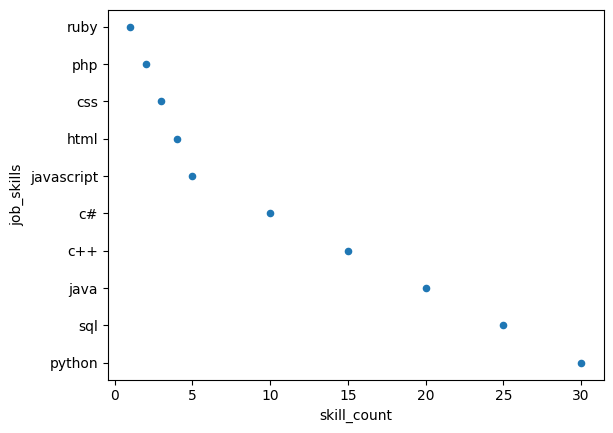

In [7]:
rf.plot(kind="scatter", x="skill_count",y="job_skills")

In [12]:
# import pandas as pd

# data = {
#     'job_skills': [
#         'sql', 'excel', 'python', 'tableau', 'power bi',
#         'r', 'sas', 'powerpoint', 'word', 'sap'
#     ],
#     'median_salary': [
#         92500.0, 84500.0, 98500.0, 95000.0, 90000.0,
#         92527.5, 90000.0, 85000.0, 80850.0, 90000.0
#     ],
#     'skill_count': [
#         92628, 67031, 57326, 46554, 39468,
#         30075, 28068, 13848, 13591, 11297
#     ]
# }

# df = pd.DataFrame(data)
# df.set_index('job_skills', inplace=True)
# df

In [17]:
"""let's now take our original dataset and focus only on statiscian"""

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)

stat = rf[rf["job_title"]== "Statistician"]
stat



,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,num_of_jobs,job_title,skills,skills_list,job__health_insurance,work_from_home
3,E09000004,bexley,1999-07-05,18621.0,NaN,21386.0,18.0,217458.0,160000.0,Statistician,"Python, Machine Learning, R, Data Analysis","[Probability, SAS, Regression]",False,False
4,E09000005,brent,1999-12-12,18532.0,NaN,20911.0,6.0,260317.0,134000.0,Statistician,"Data Analysis, Statistical Modeling, R","[Statistics, Data Cleaning, Machine Learning]",True,True
5,E09000006,bromley,1999-09-08,NaN,NaN,21293.0,13.0,NaN,113000.0,Statistician,"Statistical Modeling, Data Analysis, R, Machin...","[R, Python, Data Analysis]",False,False
6,E09000007,camden,1999-11-03,23677.0,NaN,30249.0,13.0,NaN,84000.0,Statistician,"R, Machine Learning, Python, Statistical Modeling",NaN,True,False
7,E09000008,croydon,1999-03-02,19563.0,NaN,22205.0,13.0,NaN,102000.0,Statistician,"Machine Learning, Data Analysis, R","[R, Python, Data Analysis]",True,True
8,E09000009,ealing,1999-01-11,20580.0,NaN,25046.0,12.0,302252.0,120000.0,Statistician,"Python, Machine Learning, Data Analysis","[Probability, SAS, Regression]",False,True
11,E13000001,inner london,1999-07-07,NaN,NaN,NaN,NaN,2750716.0,89000.0,Statistician,"Machine Learning, Data Analysis, Python","[Probability, SAS, Regression]",True,True
14,K02000001,united kingdom,1999-11-12,17803.0,NaN,21314.0,NaN,58684427.0,NaN,Statistician,"Machine Learning, Statistical Modeling, Data A...","[R, Python, Data Analysis]",False,True
21,E09000004,bexley,1999-09-05,18621.0,NaN,21386.0,18.0,217458.0,160000.0,Statistician,"Python, Statistical Modeling, Machine Learning","[Probability, SAS, Regression]",True,False
23,E13000001,inner london,1999-02-07,NaN,NaN,NaN,NaN,2750716.0,890121.0,Statistician,"Machine Learning, Data Analysis, Python","[Statistics, Data Cleaning, Machine Learning]",False,False


In [39]:
stat_exploded = stat.explode("skills_list")

# stat_exploded.groupby(["skills_list"]).size()
grouping1 = stat_exploded.groupby(["skills_list"]).agg(
    new_column = ("skills_list", "count"),
    stat_salary = ("mean_salary", "median")
)

grouping1_sorted = grouping1.sort_values(by="new_column", ascending=False)
grouping1_sorted

,new_column,stat_salary
skills_list,,
Probability,5,21386.0
Regression,5,21386.0
SAS,5,21386.0
Data Analysis,3,21314.0
Python,3,21314.0
R,3,21314.0
Data Cleaning,2,20911.0
Machine Learning,2,20911.0
Statistics,2,20911.0


0 Probability
1 Regression
2 SAS
3 Data Analysis
4 Python
5 R
6 Data Cleaning
7 Machine Learning
8 Statistics


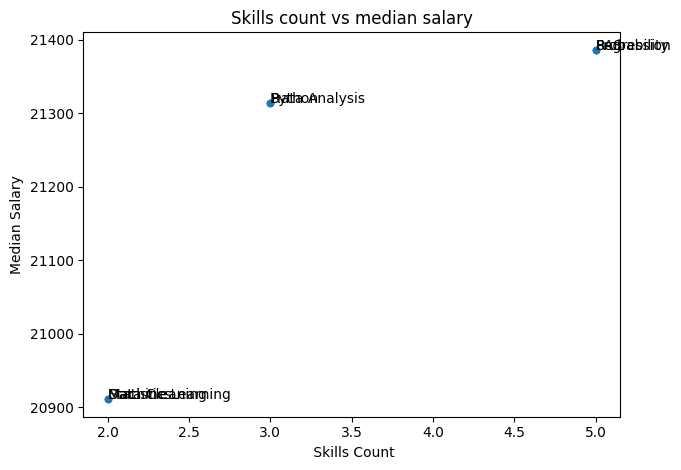

In [48]:
grouping1_sorted.plot(kind="scatter", x="new_column", y="stat_salary" )
plt.xlabel(" Skills Count")
plt.ylabel("Median Salary")
plt.title("Skills count vs median salary")
plt.tight_layout()

"""let's now add the name of skills because it doesn't add this automatically"""
for index, value23 in enumerate(grouping1_sorted.index):
    print(index, value23)
    plt.text(grouping1_sorted["new_column"].iloc[index], grouping1_sorted["stat_salary"].iloc[index], value23)



# plt.text(4,21000,"Luke")
plt.show()
